# Breast Cancer Wisconsin


The Breast Cancer Wisconsin dataset from Kaggle contains data on malignant and benign breast tumours and their respective features, examples including: radius, texture, perimeter. After taking an interest in the dataset, I was determined to utilize this data and develop a Neural Network that was able to precisely classify whether a breast tumour was malignant or benign by selecting key physical attributes then enhancing the model. 

Kaggle dataset url link:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/

### Data Visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

DATADIR = "data.csv"
df = pd.read_csv(DATADIR)
df = df.drop(columns=["Unnamed: 32"])

print ("Length of data: ", len(df))
df.head()

Length of data:  569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

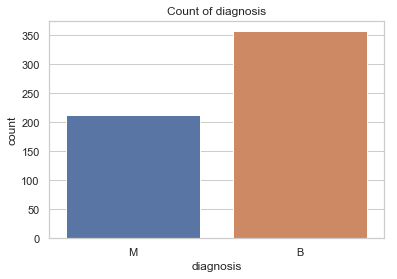

Number of Benign:  357
Number of Malignant:  212


In [2]:
# Plot countpot of diagnosis within data

sns.countplot(df['diagnosis'],label="Count")
plt.title('Count of diagnosis')
plt.show()

B, M = df['diagnosis'].value_counts()
print ("Number of Benign: ", B)
print ("Number of Malignant: ", M)

With the dataset containing similar derivatives, I wanted to inspect the features for correlation and whether they are independant of one another. I decided to categorise the data by creating a new dataframe that solely contained the mean features.

In [4]:
features_mean = df.iloc[:,1:12]
features_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


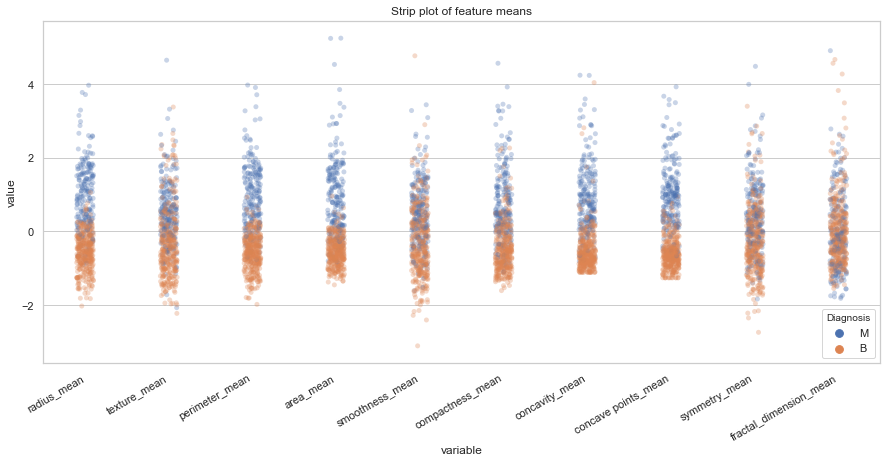

In [5]:
def normalise_col(col):
    col = (col - col.mean())/(col.std())
    return col

fig = plt.figure(figsize=(15,7))

features_mean_l = features_mean

# Normalise the data to visually compare features
for col in features_mean_l.columns:
    if col != 'diagnosis':
        features_mean_l[col] = normalise_col(features_mean_l[col])

# Reshape features_mean to long format
features_mean_l = pd.melt(features_mean_l, value_vars=features_mean_l.columns[1:], id_vars='diagnosis')

sns.stripplot(x='variable', y='value', hue='diagnosis', data=features_mean_l, alpha=0.3)

fig.autofmt_xdate()
plt.title("Strip plot of feature means")

plt.legend(title="Diagnosis", loc="lower right")

C:\Users\Jordan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Pairplot of feature means')

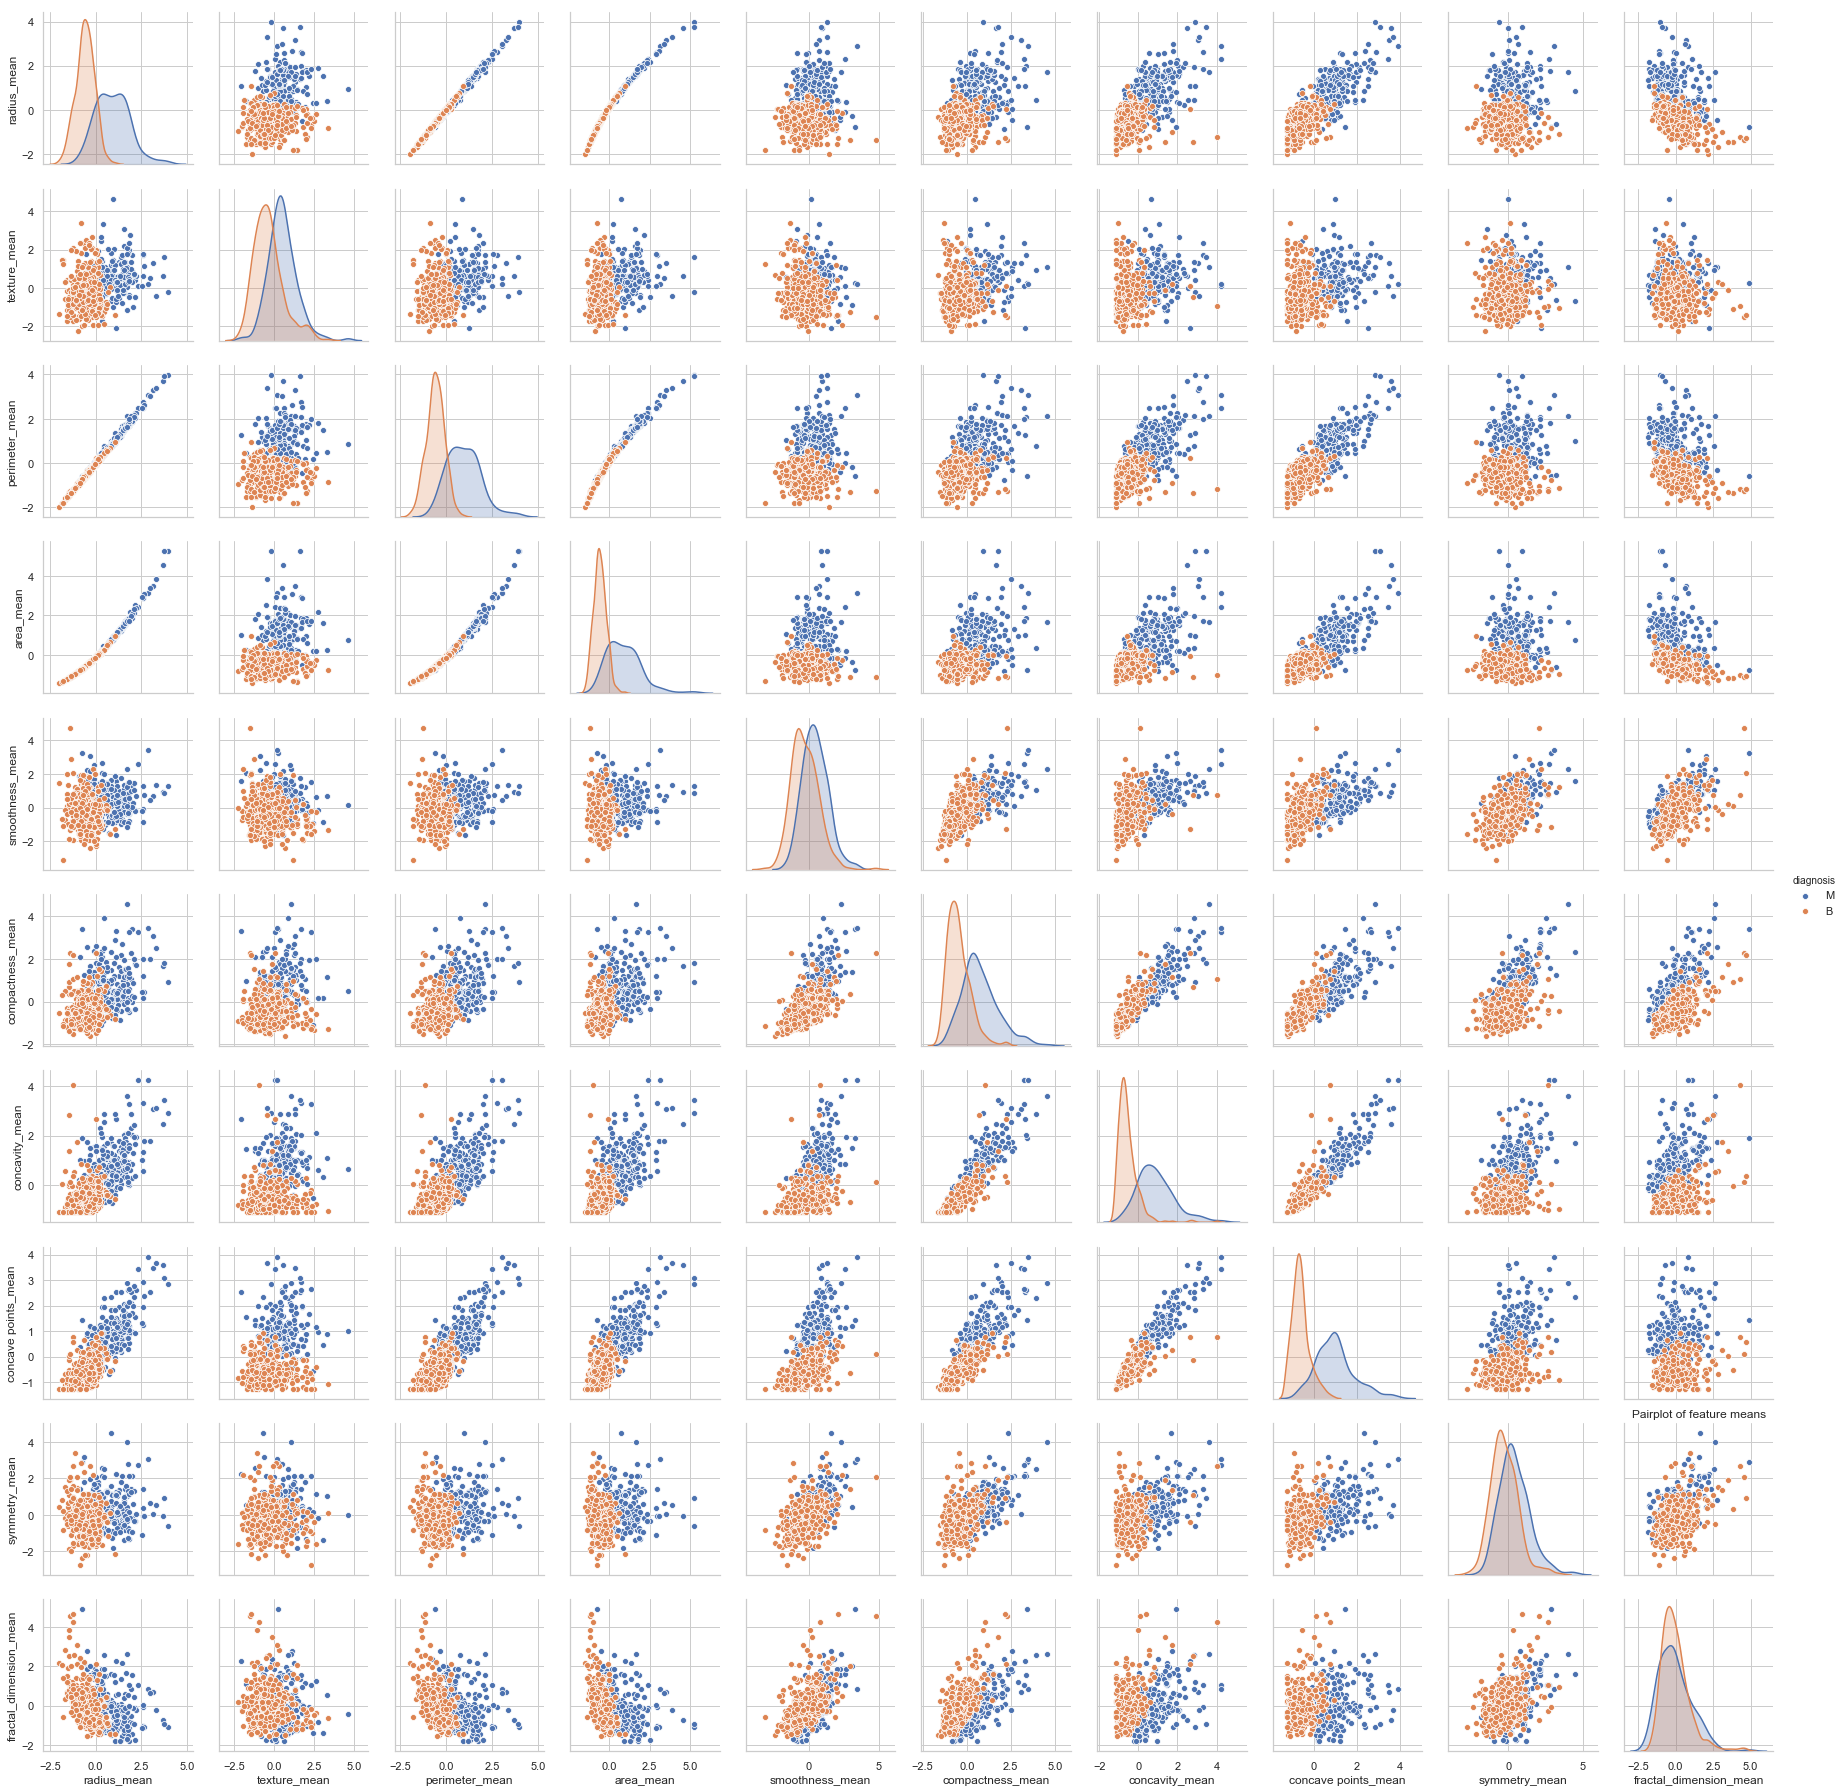

In [6]:
sns.pairplot(features_mean, hue='diagnosis')
plt.title('Pairplot of feature means')

Text(0.5, 1.0, 'Heatmap of correlation within feature means')

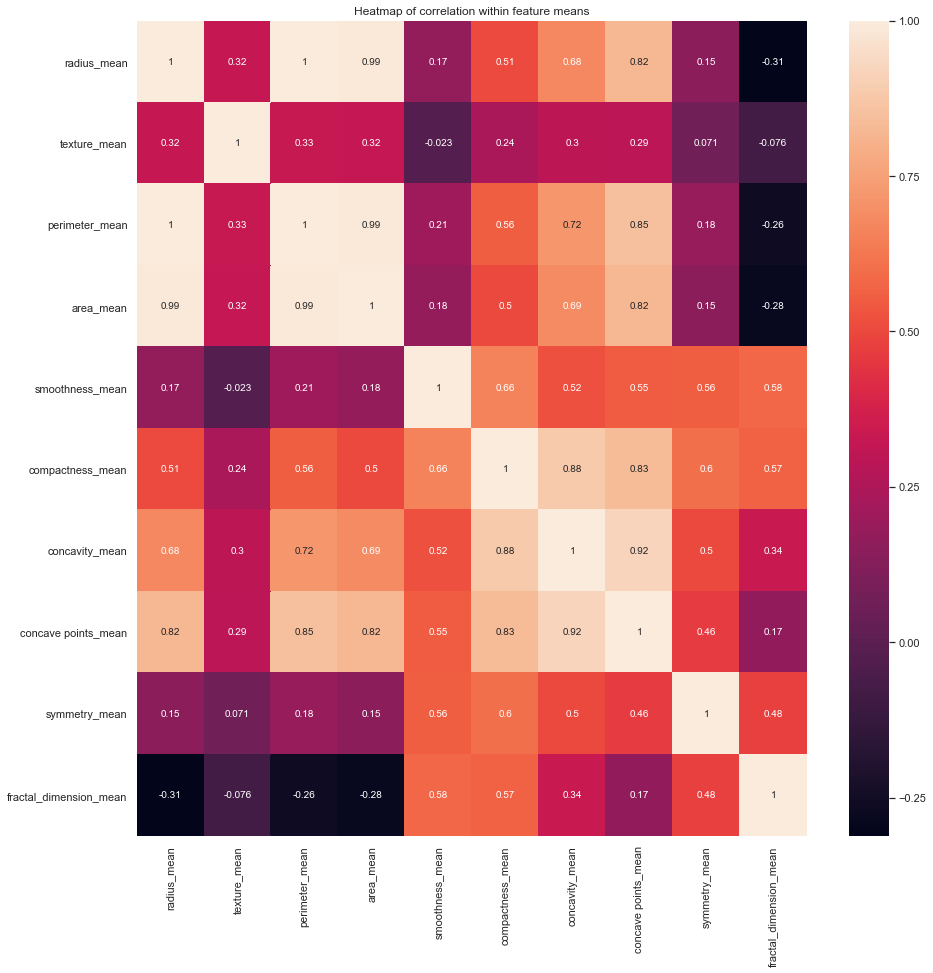

In [7]:
fig = plt.figure(figsize=(15,15))

correlation_mean = features_mean.corr()

sns.heatmap(correlation_mean, annot=True)
plt.title("Heatmap of correlation within feature means")

Evaluating the strip plot and pair plot, we can determine that the majority of the features can be distinguish from being malignant or benign with malignant tumours attaining higher valued features than benign. A high-dimensional clustering algorithm could also be used for this.

We can also detect that some features are definitely not independant of one another by representing a recognisable linear line in the pairplot and a strong correlation coefficient in the heatmap. 

One example would be the features 'radius_mean' and 'perimeter_mean', which plots a near to perfect linear line and has a correlation coefficient of 1. The jointplot is displayed below.

C:\Users\Jordan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Jordan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


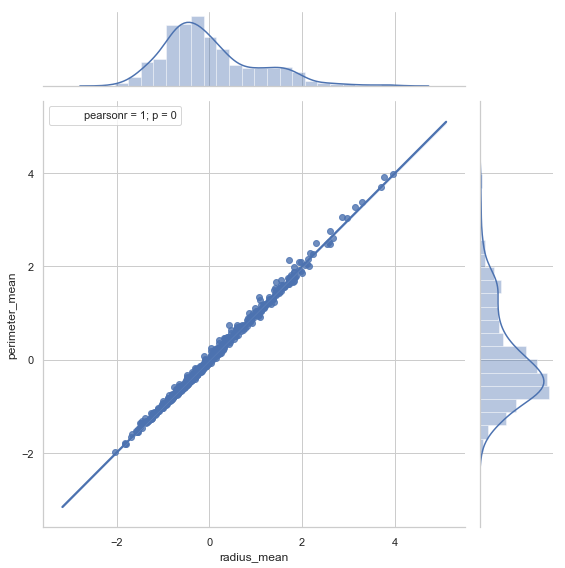

In [55]:
sns.jointplot('radius_mean', 'perimeter_mean', 
              features_mean, kind='regg', height=8).annotate(stats.pearsonr)

### Feature Selection

As shown in the previous graphs with several features highly correlated with one another, it is expected that there will further be more dependant features if the entirety of the dataset is taken into consideration. 

To avoid the models to be computationally expensive and reduce the predictive power due to high dimensionality(Hughes effect), I have decided to take three feature selection methods to compare results.

The feature selection techniques I intend on using invovles a correlation matrix and Univariate Selection techniques: Chi Squared and ANOVA F-value.

In [3]:
import pickle
from sklearn.feature_selection import SelectKBest, chi2, f_classif

Text(0.5, 1.0, 'Heatmap of correlation within data')

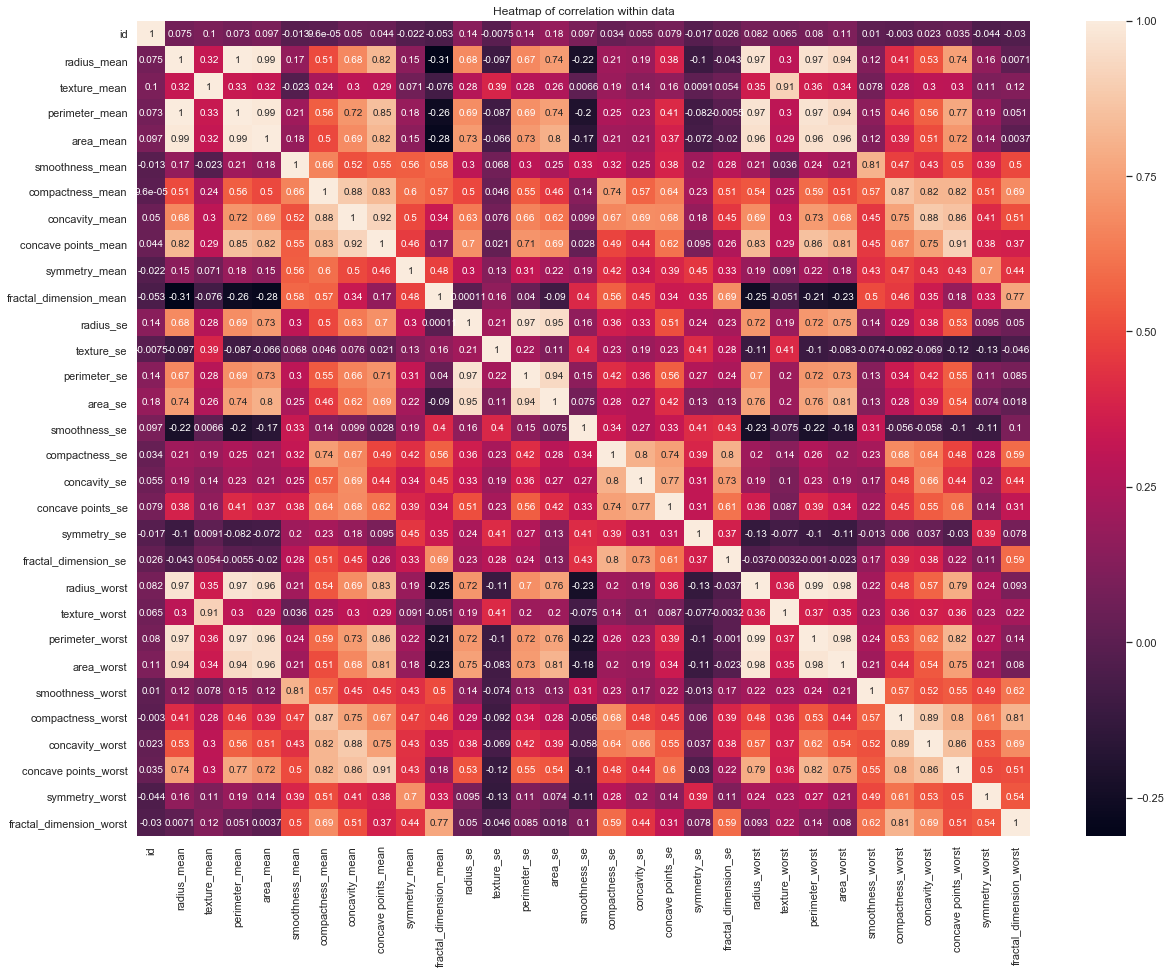

In [13]:
plt.figure(figsize=(20,15))

correlation_data = df.corr()

sns.heatmap(correlation_data, annot=True)
plt.title("Heatmap of correlation within data")

#### Correlation-based Feature Selection (CFS)

With no set rule stating what implies a high correlation coefficient, I have decided to assign it as 0.7 by inspecting the heatmap above which will give me sufficient features to input into the model.

Plotting a binary heatmap displayed below, I was able to identify and group features with high correlation then select the features that are not highly correlated. 

Text(0.5, 1.0, 'Heatmap of data with correlation coefficient >0.7')

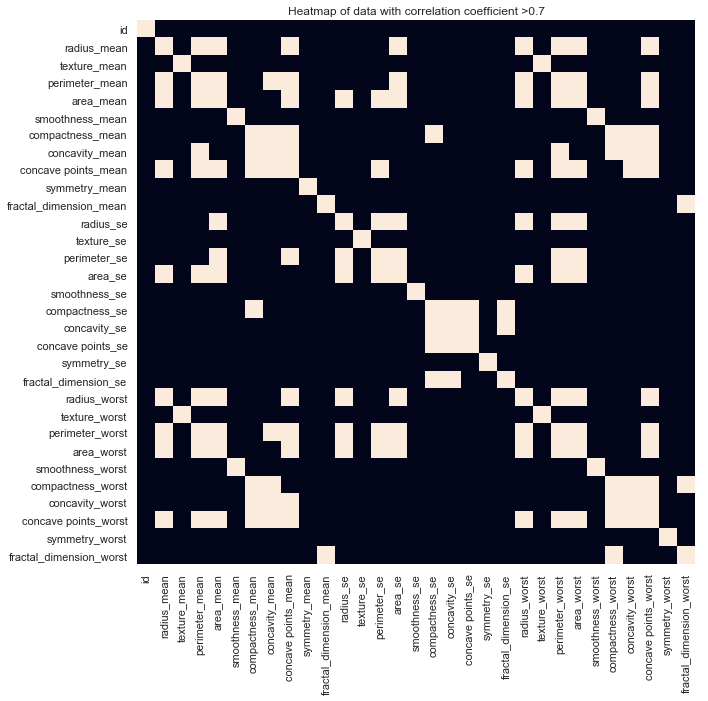

In [14]:
plt.figure(figsize=(10,10))

corr_coeff = 0.7

cc_data = (correlation_data > corr_coeff).replace({True:[1], False:[0]})

sns.heatmap(cc_data, cbar=False)
plt.title("Heatmap of data with correlation coefficient >" + str(corr_coeff))

In [17]:
# Feature Selection using correlation coefficients

# Gather unassorted column groups within data
column_groups=[]
for col in cc_data.columns:
    column_group = cc_data[col].loc[cc_data[col] == 1].index.tolist()
    column_groups.append(column_group)
               
# Merge sublists with common elements
# https://stackoverflow.com/questions/4842613/merge-lists-that-share-common-elements
groups = []
while len(column_groups)>0:
    first, *rest = column_groups
    first = set(first)

    lf = -1
    while len(first)>lf:
        lf = len(first)

        rest2 = []
        for r in rest:
            if len(first.intersection(set(r)))>0:
                first |= set(r)
            else:
                rest2.append(r)     
        rest = rest2

    #print (list(first))
    groups.append(list(first))
    column_groups = rest

# Create a new list with an element from each sublist
X_corr = []
for sublist in groups:
    X_corr.append(sublist[0])

# Save data in pickle
pickle_out = open("X_corr.pickle","wb")
pickle.dump(df[X_corr], pickle_out)
pickle_out.close()
    
print (X_corr)

['id', 'concave points_worst', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'symmetry_worst']


#### Chi Squared Feature Selection

In [27]:
# Feature selection using chi squared

X = df.iloc[:,2:]
y = df["diagnosis"].replace({"B":[0], "M":[1]})

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 
print(featureScores.nlargest(10,'Score'))  #print 10 best features

# Save in pickle
pickle_out = open("X_chi2.pickle","wb")
pickle.dump(df[featureScores.nlargest(10,'Score')['Features']], pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

           Features          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


#### ANOVA F-value Feature Selection

In [28]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 
print(featureScores.nlargest(10,'Score'))  #print 10 best features

# Save in pickle
pickle_out = open("X_f_classif.pickle","wb")
pickle.dump(df[featureScores.nlargest(10,'Score')['Features']], pickle_out)
pickle_out.close()

                Features       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939


### Comparing Feature Selections

To compare the set of features selected, I will run each feature selection in a simple Neural Network to compare results in validation loss.

I have also included an early stopping within the model to conclude the final validation loss without running the model for a high amount of epochs.

In [16]:
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import TensorBoard

In [10]:
# Normalise data
def normalise_col(col):
    col = (col - col.min())/(col.max() - col.min())
    return col

def preprocess_df(df):
    for col in df.columns:
        df[col] = normalise_col(df[col])
    
    X = df.values.tolist()
    
    return np.array(X)


# Sets of feature selections
feature_selections = ["X_corr", "X_chi2", "X_f_classif"]

pickle_in = open("Y.pickle","rb") # Open Y data
Y = pickle.load(pickle_in)

# Create dataframe to display final val_loss
df_fs_loss = pd.DataFrame(columns=['Model','val_loss'])

# Run simple NN model to compare feature selections
for feature_selection in feature_selections:
    pickle_in = open(feature_selection + ".pickle","rb") # Open X data
    X = pickle.load(pickle_in)
    X = preprocess_df(X)

    NAME = "{}-feature_selection-{}".format(feature_selection,
                                            int(time.time()))
    tensorboard = TensorBoard(log_dir="logs_feature_selection/{}"
                              .format(NAME))
    print (NAME)
    
    # Neural Network
    model_fs = Sequential([
        Dense(16, activation=tf.nn.relu, input_shape=X.shape[1:]),
        Dense(16, activation=tf.nn.relu),
        Flatten(),
        Dense(16),
        Dense(1, activation=tf.nn.sigmoid)
    ])

    model_fs.compile(loss='binary_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    
    history_fs = model_fs.fit(X, Y, epochs=100, validation_split=0.3,
                              callbacks=[tensorboard, early_stop])
    
    df_fs_loss = df_fs_loss.append(pd.DataFrame({'Model': [NAME],
                                 'val_loss': [history_fs.history['val_loss'][-1]]}), 
                   ignore_index=True).sort_values('val_loss')

X_corr-feature_selection-1567739928
Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 3ms/sample - loss: 0.6883 - acc: 0.5603 - val_loss: 0.6704 - val_acc: 0.7719
Epoch 2/100
398/398 [==============================] - 0s 317us/sample - loss: 0.6802 - acc: 0.5653 - val_loss: 0.6529 - val_acc: 0.7719
Epoch 3/100
398/398 [==============================] - 0s 207us/sample - loss: 0.6717 - acc: 0.5653 - val_loss: 0.6427 - val_acc: 0.7719
Epoch 4/100
398/398 [==============================] - 0s 349us/sample - loss: 0.6597 - acc: 0.5678 - val_loss: 0.6189 - val_acc: 0.7719
Epoch 5/100
398/398 [==============================] - 0s 346us/sample - loss: 0.6436 - acc: 0.5930 - val_loss: 0.5966 - val_acc: 0.8012
Epoch 6/100
398/398 [==============================] - 0s 346us/sample - loss: 0.6246 - acc: 0.6759 - val_loss: 0.5758 - val_acc: 0.8480
Epoch 7/100
398/398 [==============================] - 0s 349us/sample - loss: 0.5992 - acc: 0.728

398/398 [==============================] - 0s 348us/sample - loss: 0.1594 - acc: 0.9322 - val_loss: 0.2072 - val_acc: 0.9123
Epoch 24/100
398/398 [==============================] - 0s 461us/sample - loss: 0.1593 - acc: 0.9322 - val_loss: 0.2086 - val_acc: 0.9123
Epoch 25/100
398/398 [==============================] - 0s 385us/sample - loss: 0.1540 - acc: 0.9322 - val_loss: 0.2266 - val_acc: 0.9064
Epoch 26/100
398/398 [==============================] - 0s 409us/sample - loss: 0.1558 - acc: 0.9372 - val_loss: 0.1699 - val_acc: 0.9474
Epoch 27/100
398/398 [==============================] - 0s 507us/sample - loss: 0.1516 - acc: 0.9372 - val_loss: 0.1928 - val_acc: 0.9240
Epoch 28/100
398/398 [==============================] - 0s 272us/sample - loss: 0.1489 - acc: 0.9347 - val_loss: 0.1960 - val_acc: 0.9181
Epoch 29/100
398/398 [==============================] - 0s 211us/sample - loss: 0.1455 - acc: 0.9397 - val_loss: 0.1889 - val_acc: 0.9298
Epoch 30/100
398/398 [=========================

In [11]:
df_fs_loss

,Model,val_loss
2,X_f_classif-feature_selection-1567739948,0.116961
0,X_chi2-feature_selection-1567739937,0.188449
1,X_corr-feature_selection-1567739928,0.234695


<img src="feature_selection.PNG">

The dataframe and graphs plotted using TensorBoard displayed above deduces the ANOVA F-value was the optimal feature selection, to which we will be using to further refine our Neural Network.

The model seems to perform fairly sufficiently with a low validation loss and high validation accuracy, but if the model implemented to classify real maalignant breast tumours, these numbers would not suffice and would need further enhancements. 

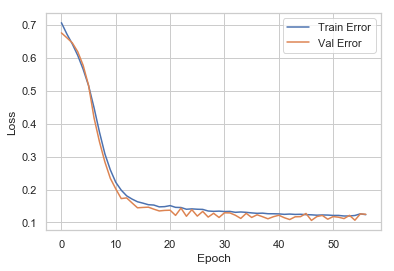

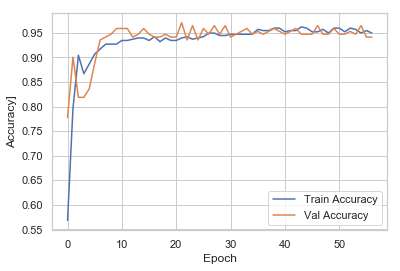

In [51]:
# Plot accuracy and loss graph 

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    # Error Graph
    plt.figure()
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Graph
    plt.figure()
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy]')
    plt.legend()
    plt.show()

plot_history(history_fs)

### Improving the model

To improve the model, I will be trialling different optimisers, number of nodes and hidden layers to compare in validation accuracy and loss. 

In [7]:
pickle_in = open("X_chi2.pickle","rb")
X = pickle.load(pickle_in)
X = preprocess_df(X)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

In [12]:
# Vairables to compare
optimizers = ["Adam", "RMSprop", "SGD"]
layer_sizes = [16,32,64]
hidden_layers = [1, 2]

# Dataframe to compare loss f models
df_om_loss = pd.DataFrame(columns=['Model','val_loss'])
           
# Run different NN models
for layer_size in layer_sizes:
    for hidden_layer in hidden_layers:
        for opt in optimizers:
                
            NAME = "{}-{}-{}-{}".format(opt,
                                        hidden_layer,
                                        layer_size,
                                        int(time.time())) 
            tensorboard = TensorBoard(log_dir="logs_tuning_NN/{}"
                                      .format(NAME))

            model_om = Sequential()

            model_om.add(Dense(layer_size, input_shape = X.shape[1:]))
            model_om.add(Activation('relu'))

            for l in range(hidden_layer-1):
                model_om.add(Dense(layer_size))
                model_om.add(Activation('relu'))

            model_om.add(Flatten())
            model_om.add(Dense(layer_size))

            model_om.add(Dense(1))
            model_om.add(Activation('sigmoid'))

            if opt == "RMSprop":
                model_om.compile(loss='binary_crossentropy',
                             optimizer=tf.keras.optimizers.RMSprop(0.001),
                             metrics=['accuracy'])
            else:
                model_om.compile(loss='binary_crossentropy',
                             optimizer=opt,
                             metrics=['accuracy'])
                
            early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

            history_om = model_om.fit(X, Y, epochs=100, validation_split=0.3,
                                callbacks=[tensorboard, early_stop])

            # Append loss dataframe
            df_om_loss = df_om_loss.append(
                pd.DataFrame({'Model': [NAME],
                              'val_loss': [history_om.history['val_loss'][-1]]}), 
                ignore_index=True).sort_values('val_loss')

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 3ms/sample - loss: 0.7849 - acc: 0.5477 - val_loss: 0.6964 - val_acc: 0.7368
Epoch 2/100
398/398 [==============================] - 0s 201us/sample - loss: 0.7319 - acc: 0.4372 - val_loss: 0.6989 - val_acc: 0.3860
Epoch 3/100
398/398 [==============================] - 0s 211us/sample - loss: 0.6879 - acc: 0.4573 - val_loss: 0.6855 - val_acc: 0.3392
Epoch 4/100
398/398 [==============================] - 0s 236us/sample - loss: 0.6549 - acc: 0.6432 - val_loss: 0.6673 - val_acc: 0.5029
Epoch 5/100
398/398 [==============================] - 0s 236us/sample - loss: 0.6232 - acc: 0.7236 - val_loss: 0.6477 - val_acc: 0.6023
Epoch 6/100
398/398 [==============================] - 0s 170us/sample - loss: 0.5925 - acc: 0.8015 - val_loss: 0.6167 - val_acc: 0.7485
Epoch 7/100
398/398 [==============================] - 0s 228us/sample - loss: 0.5602 - acc: 0.8392 - val_loss: 0.5875 - val_acc: 0.78

Epoch 60/100
398/398 [==============================] - 0s 261us/sample - loss: 0.1331 - acc: 0.9447 - val_loss: 0.1182 - val_acc: 0.9591
Epoch 61/100
398/398 [==============================] - 0s 313us/sample - loss: 0.1317 - acc: 0.9447 - val_loss: 0.1310 - val_acc: 0.9415
Epoch 62/100
398/398 [==============================] - 0s 216us/sample - loss: 0.1331 - acc: 0.9422 - val_loss: 0.1246 - val_acc: 0.9474
Epoch 63/100
398/398 [==============================] - 0s 238us/sample - loss: 0.1321 - acc: 0.9422 - val_loss: 0.1268 - val_acc: 0.9415
Epoch 64/100
398/398 [==============================] - 0s 336us/sample - loss: 0.1323 - acc: 0.9422 - val_loss: 0.1264 - val_acc: 0.9415
Epoch 65/100
398/398 [==============================] - 0s 286us/sample - loss: 0.1325 - acc: 0.9397 - val_loss: 0.1138 - val_acc: 0.9591
Epoch 66/100
398/398 [==============================] - 0s 233us/sample - loss: 0.1314 - acc: 0.9422 - val_loss: 0.1343 - val_acc: 0.9357
Epoch 67/100
398/398 [============

398/398 [==============================] - 0s 303us/sample - loss: 0.1340 - acc: 0.9548 - val_loss: 0.1145 - val_acc: 0.9591
Epoch 45/100
398/398 [==============================] - 0s 278us/sample - loss: 0.1338 - acc: 0.9573 - val_loss: 0.1359 - val_acc: 0.9474
Epoch 46/100
398/398 [==============================] - 0s 393us/sample - loss: 0.1347 - acc: 0.9523 - val_loss: 0.1135 - val_acc: 0.9591
Epoch 47/100
398/398 [==============================] - 0s 358us/sample - loss: 0.1322 - acc: 0.9548 - val_loss: 0.1308 - val_acc: 0.9474
Epoch 48/100
398/398 [==============================] - 0s 195us/sample - loss: 0.1335 - acc: 0.9523 - val_loss: 0.1188 - val_acc: 0.9649
Epoch 49/100
398/398 [==============================] - 0s 300us/sample - loss: 0.1315 - acc: 0.9548 - val_loss: 0.1011 - val_acc: 0.9708
Epoch 50/100
398/398 [==============================] - 0s 203us/sample - loss: 0.1336 - acc: 0.9497 - val_loss: 0.1162 - val_acc: 0.9649
Train on 398 samples, validate on 171 samples
E

Epoch 53/100
398/398 [==============================] - 0s 442us/sample - loss: 0.3540 - acc: 0.9296 - val_loss: 0.3541 - val_acc: 0.9474
Epoch 54/100
398/398 [==============================] - 0s 442us/sample - loss: 0.3480 - acc: 0.9322 - val_loss: 0.3473 - val_acc: 0.9474
Epoch 55/100
398/398 [==============================] - 0s 464us/sample - loss: 0.3416 - acc: 0.9347 - val_loss: 0.3399 - val_acc: 0.9532
Epoch 56/100
398/398 [==============================] - 0s 418us/sample - loss: 0.3357 - acc: 0.9347 - val_loss: 0.3323 - val_acc: 0.9532
Epoch 57/100
398/398 [==============================] - 0s 366us/sample - loss: 0.3297 - acc: 0.9322 - val_loss: 0.3259 - val_acc: 0.9532
Epoch 58/100
398/398 [==============================] - 0s 316us/sample - loss: 0.3242 - acc: 0.9322 - val_loss: 0.3201 - val_acc: 0.9532
Epoch 59/100
398/398 [==============================] - 0s 306us/sample - loss: 0.3186 - acc: 0.9347 - val_loss: 0.3160 - val_acc: 0.9532
Epoch 60/100
398/398 [============

398/398 [==============================] - 0s 231us/sample - loss: 0.2431 - acc: 0.9347 - val_loss: 0.2197 - val_acc: 0.9591
Epoch 12/100
398/398 [==============================] - 0s 335us/sample - loss: 0.2064 - acc: 0.9347 - val_loss: 0.1901 - val_acc: 0.9591
Epoch 13/100
398/398 [==============================] - 0s 311us/sample - loss: 0.1891 - acc: 0.9397 - val_loss: 0.1641 - val_acc: 0.9649
Epoch 14/100
398/398 [==============================] - 0s 390us/sample - loss: 0.1718 - acc: 0.9322 - val_loss: 0.1616 - val_acc: 0.9532
Epoch 15/100
398/398 [==============================] - 0s 351us/sample - loss: 0.1633 - acc: 0.9447 - val_loss: 0.1515 - val_acc: 0.9591
Epoch 16/100
398/398 [==============================] - 0s 346us/sample - loss: 0.1615 - acc: 0.9296 - val_loss: 0.1404 - val_acc: 0.9649
Epoch 17/100
398/398 [==============================] - 0s 182us/sample - loss: 0.1727 - acc: 0.9271 - val_loss: 0.1680 - val_acc: 0.9298
Epoch 18/100
398/398 [=========================

Epoch 42/100
398/398 [==============================] - 0s 366us/sample - loss: 0.1369 - acc: 0.9523 - val_loss: 0.1057 - val_acc: 0.9649
Epoch 43/100
398/398 [==============================] - 0s 354us/sample - loss: 0.1400 - acc: 0.9447 - val_loss: 0.1231 - val_acc: 0.9532
Epoch 44/100
398/398 [==============================] - 0s 311us/sample - loss: 0.1392 - acc: 0.9422 - val_loss: 0.1479 - val_acc: 0.9357
Epoch 45/100
398/398 [==============================] - 0s 321us/sample - loss: 0.1401 - acc: 0.9472 - val_loss: 0.1268 - val_acc: 0.9532
Epoch 46/100
398/398 [==============================] - 0s 326us/sample - loss: 0.1402 - acc: 0.9497 - val_loss: 0.1200 - val_acc: 0.9532
Epoch 47/100
398/398 [==============================] - 0s 180us/sample - loss: 0.1385 - acc: 0.9447 - val_loss: 0.1399 - val_acc: 0.9415
Epoch 48/100
398/398 [==============================] - 0s 183us/sample - loss: 0.1372 - acc: 0.9447 - val_loss: 0.1084 - val_acc: 0.9649
Epoch 49/100
398/398 [============

398/398 [==============================] - 0s 264us/sample - loss: 0.6390 - acc: 0.5678 - val_loss: 0.5902 - val_acc: 0.7719
Epoch 50/100
398/398 [==============================] - 0s 310us/sample - loss: 0.6356 - acc: 0.5779 - val_loss: 0.5870 - val_acc: 0.7836
Epoch 51/100
398/398 [==============================] - 0s 295us/sample - loss: 0.6320 - acc: 0.5905 - val_loss: 0.5830 - val_acc: 0.7836
Epoch 52/100
398/398 [==============================] - 0s 278us/sample - loss: 0.6281 - acc: 0.6030 - val_loss: 0.5793 - val_acc: 0.7836
Epoch 53/100
398/398 [==============================] - 0s 396us/sample - loss: 0.6239 - acc: 0.6106 - val_loss: 0.5764 - val_acc: 0.8129
Epoch 54/100
398/398 [==============================] - 0s 181us/sample - loss: 0.6196 - acc: 0.6558 - val_loss: 0.5714 - val_acc: 0.8304
Epoch 55/100
398/398 [==============================] - 0s 186us/sample - loss: 0.6149 - acc: 0.6683 - val_loss: 0.5683 - val_acc: 0.8538
Epoch 56/100
398/398 [=========================

398/398 [==============================] - 0s 419us/sample - loss: 0.3595 - acc: 0.9246 - val_loss: 0.3530 - val_acc: 0.9181
Epoch 9/100
398/398 [==============================] - 0s 288us/sample - loss: 0.3134 - acc: 0.9246 - val_loss: 0.2820 - val_acc: 0.9532
Epoch 10/100
398/398 [==============================] - 0s 304us/sample - loss: 0.2756 - acc: 0.9372 - val_loss: 0.2631 - val_acc: 0.9474
Epoch 11/100
398/398 [==============================] - 0s 377us/sample - loss: 0.2448 - acc: 0.9347 - val_loss: 0.2228 - val_acc: 0.9532
Epoch 12/100
398/398 [==============================] - 0s 429us/sample - loss: 0.2219 - acc: 0.9372 - val_loss: 0.2059 - val_acc: 0.9591
Epoch 13/100
398/398 [==============================] - 0s 426us/sample - loss: 0.2052 - acc: 0.9347 - val_loss: 0.1844 - val_acc: 0.9532
Epoch 14/100
398/398 [==============================] - 0s 221us/sample - loss: 0.1903 - acc: 0.9422 - val_loss: 0.1682 - val_acc: 0.9532
Epoch 15/100
398/398 [==========================

398/398 [==============================] - 0s 229us/sample - loss: 0.1412 - acc: 0.9397 - val_loss: 0.1242 - val_acc: 0.9591
Epoch 24/100
398/398 [==============================] - 0s 203us/sample - loss: 0.1380 - acc: 0.9447 - val_loss: 0.1276 - val_acc: 0.9474
Epoch 25/100
398/398 [==============================] - 0s 200us/sample - loss: 0.1364 - acc: 0.9447 - val_loss: 0.1326 - val_acc: 0.9474
Epoch 26/100
398/398 [==============================] - 0s 180us/sample - loss: 0.1358 - acc: 0.9447 - val_loss: 0.1150 - val_acc: 0.9532
Epoch 27/100
398/398 [==============================] - 0s 181us/sample - loss: 0.1352 - acc: 0.9397 - val_loss: 0.1488 - val_acc: 0.9357
Epoch 28/100
398/398 [==============================] - 0s 281us/sample - loss: 0.1341 - acc: 0.9497 - val_loss: 0.1102 - val_acc: 0.9591
Epoch 29/100
398/398 [==============================] - 0s 271us/sample - loss: 0.1339 - acc: 0.9497 - val_loss: 0.1175 - val_acc: 0.9591
Epoch 30/100
398/398 [=========================

Epoch 35/100
398/398 [==============================] - 0s 180us/sample - loss: 0.4001 - acc: 0.9246 - val_loss: 0.3967 - val_acc: 0.9591
Epoch 36/100
398/398 [==============================] - 0s 203us/sample - loss: 0.3921 - acc: 0.9246 - val_loss: 0.3864 - val_acc: 0.9649
Epoch 37/100
398/398 [==============================] - 0s 180us/sample - loss: 0.3843 - acc: 0.9221 - val_loss: 0.3772 - val_acc: 0.9649
Epoch 38/100
398/398 [==============================] - 0s 177us/sample - loss: 0.3766 - acc: 0.9221 - val_loss: 0.3697 - val_acc: 0.9649
Epoch 39/100
398/398 [==============================] - 0s 181us/sample - loss: 0.3690 - acc: 0.9246 - val_loss: 0.3611 - val_acc: 0.9649
Epoch 40/100
398/398 [==============================] - 0s 180us/sample - loss: 0.3618 - acc: 0.9221 - val_loss: 0.3545 - val_acc: 0.9649
Epoch 41/100
398/398 [==============================] - 0s 263us/sample - loss: 0.3549 - acc: 0.9246 - val_loss: 0.3483 - val_acc: 0.9649
Epoch 42/100
398/398 [============

398/398 [==============================] - 0s 286us/sample - loss: 0.1929 - acc: 0.9271 - val_loss: 0.1769 - val_acc: 0.9532
Epoch 95/100
398/398 [==============================] - 0s 255us/sample - loss: 0.1918 - acc: 0.9296 - val_loss: 0.1724 - val_acc: 0.9532
Epoch 96/100
398/398 [==============================] - 0s 416us/sample - loss: 0.1911 - acc: 0.9296 - val_loss: 0.1760 - val_acc: 0.9532
Epoch 97/100
398/398 [==============================] - 0s 292us/sample - loss: 0.1899 - acc: 0.9271 - val_loss: 0.1734 - val_acc: 0.9532
Epoch 98/100
398/398 [==============================] - 0s 205us/sample - loss: 0.1893 - acc: 0.9271 - val_loss: 0.1732 - val_acc: 0.9532
Epoch 99/100
398/398 [==============================] - 0s 231us/sample - loss: 0.1885 - acc: 0.9271 - val_loss: 0.1710 - val_acc: 0.9532
Epoch 100/100
398/398 [==============================] - 0s 299us/sample - loss: 0.1872 - acc: 0.9271 - val_loss: 0.1720 - val_acc: 0.9532
Train on 398 samples, validate on 171 samples


Epoch 27/100
398/398 [==============================] - 0s 374us/sample - loss: 0.1203 - acc: 0.9523 - val_loss: 0.0829 - val_acc: 0.9708
Epoch 28/100
398/398 [==============================] - 0s 278us/sample - loss: 0.1188 - acc: 0.9548 - val_loss: 0.1597 - val_acc: 0.9123
Epoch 29/100
398/398 [==============================] - 0s 211us/sample - loss: 0.1195 - acc: 0.9523 - val_loss: 0.0889 - val_acc: 0.9591
Epoch 30/100
398/398 [==============================] - 0s 231us/sample - loss: 0.1183 - acc: 0.9573 - val_loss: 0.1670 - val_acc: 0.9123
Epoch 31/100
398/398 [==============================] - 0s 367us/sample - loss: 0.1181 - acc: 0.9598 - val_loss: 0.0998 - val_acc: 0.9591
Epoch 32/100
398/398 [==============================] - 0s 389us/sample - loss: 0.1156 - acc: 0.9573 - val_loss: 0.1486 - val_acc: 0.9181
Epoch 33/100
398/398 [==============================] - 0s 424us/sample - loss: 0.1134 - acc: 0.9573 - val_loss: 0.0755 - val_acc: 0.9766
Epoch 34/100
398/398 [============

398/398 [==============================] - 0s 199us/sample - loss: 0.4449 - acc: 0.9196 - val_loss: 0.4399 - val_acc: 0.9415
Epoch 40/100
398/398 [==============================] - 0s 211us/sample - loss: 0.4331 - acc: 0.9171 - val_loss: 0.4284 - val_acc: 0.9415
Epoch 41/100
398/398 [==============================] - 0s 291us/sample - loss: 0.4219 - acc: 0.9196 - val_loss: 0.4171 - val_acc: 0.9415
Epoch 42/100
398/398 [==============================] - 0s 285us/sample - loss: 0.4103 - acc: 0.9171 - val_loss: 0.4060 - val_acc: 0.9415
Epoch 43/100
398/398 [==============================] - 0s 308us/sample - loss: 0.3993 - acc: 0.9196 - val_loss: 0.3968 - val_acc: 0.9415
Epoch 44/100
398/398 [==============================] - 0s 288us/sample - loss: 0.3882 - acc: 0.9246 - val_loss: 0.3865 - val_acc: 0.9415
Epoch 45/100
398/398 [==============================] - 0s 294us/sample - loss: 0.3775 - acc: 0.9221 - val_loss: 0.3745 - val_acc: 0.9415
Epoch 46/100
398/398 [=========================

398/398 [==============================] - 0s 349us/sample - loss: 0.1745 - acc: 0.9347 - val_loss: 0.1578 - val_acc: 0.9532
Epoch 99/100
398/398 [==============================] - 0s 420us/sample - loss: 0.1734 - acc: 0.9347 - val_loss: 0.1556 - val_acc: 0.9532
Epoch 100/100
398/398 [==============================] - 0s 366us/sample - loss: 0.1728 - acc: 0.9347 - val_loss: 0.1527 - val_acc: 0.9532
Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 4ms/sample - loss: 0.6476 - acc: 0.4623 - val_loss: 0.6980 - val_acc: 0.2982
Epoch 2/100
398/398 [==============================] - 0s 223us/sample - loss: 0.5979 - acc: 0.5075 - val_loss: 0.6591 - val_acc: 0.4152
Epoch 3/100
398/398 [==============================] - 0s 202us/sample - loss: 0.5419 - acc: 0.7362 - val_loss: 0.5608 - val_acc: 0.7895
Epoch 4/100
398/398 [==============================] - 0s 208us/sample - loss: 0.4693 - acc: 0.8719 - val_loss: 0.4633 - val_acc: 0.9006
Epoch 

Epoch 14/100
398/398 [==============================] - 0s 200us/sample - loss: 0.1439 - acc: 0.9623 - val_loss: 0.1369 - val_acc: 0.9532
Epoch 15/100
398/398 [==============================] - 0s 185us/sample - loss: 0.1423 - acc: 0.9472 - val_loss: 0.2031 - val_acc: 0.8830
Epoch 16/100
398/398 [==============================] - 0s 195us/sample - loss: 0.1415 - acc: 0.9472 - val_loss: 0.1831 - val_acc: 0.9123
Epoch 17/100
398/398 [==============================] - 0s 185us/sample - loss: 0.1391 - acc: 0.9497 - val_loss: 0.1205 - val_acc: 0.9649
Epoch 18/100
398/398 [==============================] - 0s 228us/sample - loss: 0.1337 - acc: 0.9548 - val_loss: 0.1151 - val_acc: 0.9649
Epoch 19/100
398/398 [==============================] - 0s 213us/sample - loss: 0.1309 - acc: 0.9447 - val_loss: 0.1023 - val_acc: 0.9649
Epoch 20/100
398/398 [==============================] - 0s 226us/sample - loss: 0.1310 - acc: 0.9548 - val_loss: 0.1532 - val_acc: 0.9298
Epoch 21/100
398/398 [============

Epoch 15/100
398/398 [==============================] - 0s 221us/sample - loss: 0.5067 - acc: 0.9246 - val_loss: 0.5240 - val_acc: 0.8947
Epoch 16/100
398/398 [==============================] - 0s 218us/sample - loss: 0.4968 - acc: 0.9296 - val_loss: 0.5153 - val_acc: 0.8947
Epoch 17/100
398/398 [==============================] - 0s 223us/sample - loss: 0.4872 - acc: 0.9296 - val_loss: 0.5057 - val_acc: 0.9006
Epoch 18/100
398/398 [==============================] - 0s 193us/sample - loss: 0.4778 - acc: 0.9296 - val_loss: 0.4927 - val_acc: 0.9181
Epoch 19/100
398/398 [==============================] - 0s 248us/sample - loss: 0.4680 - acc: 0.9372 - val_loss: 0.4833 - val_acc: 0.9181
Epoch 20/100
398/398 [==============================] - 0s 218us/sample - loss: 0.4586 - acc: 0.9372 - val_loss: 0.4733 - val_acc: 0.9298
Epoch 21/100
398/398 [==============================] - 0s 221us/sample - loss: 0.4495 - acc: 0.9397 - val_loss: 0.4630 - val_acc: 0.9298
Epoch 22/100
398/398 [============

398/398 [==============================] - 0s 216us/sample - loss: 0.1997 - acc: 0.9347 - val_loss: 0.1933 - val_acc: 0.9474
Epoch 75/100
398/398 [==============================] - 0s 221us/sample - loss: 0.1980 - acc: 0.9322 - val_loss: 0.1892 - val_acc: 0.9474
Epoch 76/100
398/398 [==============================] - 0s 238us/sample - loss: 0.1965 - acc: 0.9347 - val_loss: 0.1873 - val_acc: 0.9532
Epoch 77/100
398/398 [==============================] - 0s 283us/sample - loss: 0.1952 - acc: 0.9322 - val_loss: 0.1869 - val_acc: 0.9474
Epoch 78/100
398/398 [==============================] - 0s 256us/sample - loss: 0.1941 - acc: 0.9271 - val_loss: 0.1872 - val_acc: 0.9474
Epoch 79/100
398/398 [==============================] - 0s 258us/sample - loss: 0.1927 - acc: 0.9322 - val_loss: 0.1861 - val_acc: 0.9474
Epoch 80/100
398/398 [==============================] - 0s 243us/sample - loss: 0.1916 - acc: 0.9347 - val_loss: 0.1836 - val_acc: 0.9474
Epoch 81/100
398/398 [=========================

398/398 [==============================] - 0s 221us/sample - loss: 0.1117 - acc: 0.9648 - val_loss: 0.1101 - val_acc: 0.9474
Epoch 34/100
398/398 [==============================] - 0s 231us/sample - loss: 0.1164 - acc: 0.9523 - val_loss: 0.0952 - val_acc: 0.9766
Epoch 35/100
398/398 [==============================] - 0s 210us/sample - loss: 0.1117 - acc: 0.9573 - val_loss: 0.1117 - val_acc: 0.9474
Epoch 36/100
398/398 [==============================] - 0s 231us/sample - loss: 0.1136 - acc: 0.9573 - val_loss: 0.1070 - val_acc: 0.9532
Epoch 37/100
398/398 [==============================] - 0s 210us/sample - loss: 0.1083 - acc: 0.9573 - val_loss: 0.0751 - val_acc: 0.9649
Epoch 38/100
398/398 [==============================] - 0s 231us/sample - loss: 0.1170 - acc: 0.9573 - val_loss: 0.1311 - val_acc: 0.9298
Epoch 39/100
398/398 [==============================] - 0s 210us/sample - loss: 0.1160 - acc: 0.9573 - val_loss: 0.1080 - val_acc: 0.9591
Epoch 40/100
398/398 [=========================

Epoch 45/100
398/398 [==============================] - 0s 208us/sample - loss: 0.1103 - acc: 0.9523 - val_loss: 0.1371 - val_acc: 0.9357
Epoch 46/100
398/398 [==============================] - 0s 231us/sample - loss: 0.1142 - acc: 0.9573 - val_loss: 0.0896 - val_acc: 0.9649
Epoch 47/100
398/398 [==============================] - 0s 210us/sample - loss: 0.1096 - acc: 0.9724 - val_loss: 0.1472 - val_acc: 0.9240
Epoch 48/100
398/398 [==============================] - 0s 233us/sample - loss: 0.1063 - acc: 0.9648 - val_loss: 0.1043 - val_acc: 0.9474
Epoch 49/100
398/398 [==============================] - 0s 208us/sample - loss: 0.1236 - acc: 0.9472 - val_loss: 0.0976 - val_acc: 0.9474
Epoch 50/100
398/398 [==============================] - 0s 226us/sample - loss: 0.1034 - acc: 0.9598 - val_loss: 0.2830 - val_acc: 0.8772
Epoch 51/100
398/398 [==============================] - 0s 210us/sample - loss: 0.1098 - acc: 0.9573 - val_loss: 0.0731 - val_acc: 0.9708
Train on 398 samples, validate on 

398/398 [==============================] - 0s 200us/sample - loss: 0.2174 - acc: 0.9347 - val_loss: 0.2176 - val_acc: 0.9357
Epoch 54/100
398/398 [==============================] - 0s 268us/sample - loss: 0.2144 - acc: 0.9372 - val_loss: 0.2141 - val_acc: 0.9415
Epoch 55/100
398/398 [==============================] - 0s 203us/sample - loss: 0.2111 - acc: 0.9372 - val_loss: 0.2057 - val_acc: 0.9532
Epoch 56/100
398/398 [==============================] - 0s 368us/sample - loss: 0.2081 - acc: 0.9372 - val_loss: 0.1976 - val_acc: 0.9591
Epoch 57/100
398/398 [==============================] - 0s 228us/sample - loss: 0.2050 - acc: 0.9322 - val_loss: 0.1935 - val_acc: 0.9591
Epoch 58/100
398/398 [==============================] - 0s 283us/sample - loss: 0.2024 - acc: 0.9296 - val_loss: 0.1950 - val_acc: 0.9532
Epoch 59/100
398/398 [==============================] - 0s 226us/sample - loss: 0.2001 - acc: 0.9397 - val_loss: 0.1943 - val_acc: 0.9474
Epoch 60/100
398/398 [=========================

In [13]:
df_om_loss

,Model,val_loss
0,RMSprop-2-64-1567740327,0.073069
1,Adam-2-64-1567740311,0.079380
2,RMSprop-1-32-1567740190,0.103237
3,Adam-1-64-1567740267,0.108091
4,Adam-2-32-1567740221,0.115874
5,RMSprop-1-16-1567740100,0.116202
6,RMSprop-2-32-1567740234,0.121370
7,Adam-2-16-1567740135,0.124478
8,RMSprop-1-64-1567740280,0.127869
9,Adam-1-16-1567740084,0.131396


The first image below displays graphs for the top 5 models with respect to the validation loss and the second image displays the graphs for RMSprop with the alterations in number of hidden layers and nodes per layer.

Although difficult to read due to the small significant change in value and applying smoothing for a more informative graphical representation, the model conveys that the best final activation function for this dataset would be the RMSprop and increasing the number of nodes and hidden layers will improve the model. The final model, RMSprop-2-64-1567740327, was able to result in a validation loss of 0.0731 and a validation accuracy of 0.9708. 

<img src="optimising_model.PNG">

<img src="om_rmsprop.PNG">